# Ejercicios de preprocesamiento de datos textuales

## Primera parte

Carga nuevamente el artículo de Psychology Today que trabajaste la semana pasada:

In [ ]:
#!python -m spacy download en_core_web_sm

In [3]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup

# Get html
url = "https://www.psychologytoday.com/us/blog/between-cultures/202205/the-psychologically-rich-life"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:23.0) Gecko/20100101 Firefox/23.0"
}
req = Request(url=url, headers=headers)
html = urlopen(req).read()

# Parse html
soup = BeautifulSoup(html)
raw = soup.get_text(strip=True)

# Select relevant portion of text
fragment = raw[1731:10286]
fragment

'The Psychologically Rich LifeBeyond, or beside, meaningfulness and happiness is psychological richness.Posted May 26, 2022|Reviewed by Kaja PerinaShareTweetEmailKey pointsThe psychologically rich life differs from the existing hedonic-eudaimonic dichotomy in a number of ways.The psychologically rich life comprises novel, complex and interesting experiences that lead to changes in perspective.The stories that we accumulate and share with others are the currency of our psychological wealth.Instructions for living a life.Payattention.Be astonished.Tell about it.Mary OliverPsychologist Shige Oishi had been studyinghappinessfor 20 years, when one summer, he decided to pause and take stock of the wealth of accumulated research. Among his biggest insights was the role our connections with others played in the quality of our lives. The science was equally clear: although well-being had many renditions,the good life– the one common elusive aspiration that humans around the world shared – follo

1. Realiza el preprocesamiento que consideres necesario.

In [4]:
# Escribe tu respuesta aquí

import spacy

nlp = spacy.load("en_core_web_sm")
documents = fragment

content_sentences = [
    " ".join(
        [
            token.lemma_
            for token in sentence
            if token.pos_ in {"NOUN", "VERB", "PROPN", "ADJ", "ADV"}
            and not token.is_stop
        ]
    )
    for sentence in nlp(documents).sents
]
content_sentences

['Psychologically Rich LifeBeyond meaningfulness happiness psychological richness',
 'Posted Kaja PerinaShareTweetEmailKey pointsThe psychologically rich life differ exist hedonic eudaimonic dichotomy number way',
 'psychologically rich life comprise novel complex interesting experience lead change perspective',
 'story accumulate share currency psychological wealth',
 'instruction live life',
 'payattention',
 'astonished',
 'tell',
 'Mary OliverPsychologist Shige Oishi year summer decide pause stock wealth accumulate research',
 'big insight role connection play quality life',
 'science equally clear rendition good life common elusive aspiration human world share follow mainhedonicandeudaimonicpathway',
 'relationship implicate',
 'Oishi examine auspicious circumstance story feel incomplete',
 'good life obtaininghappinessandmeane',
 'Oishi inkling confirm student protagonist Nietzsche Hesse story natural disaster survivor Oishi call forget people literature',
 'good life appear reac

2. Realiza un conteo de tipo TF-IDF y preséntalo en un gráfico. ¿Qué observas?

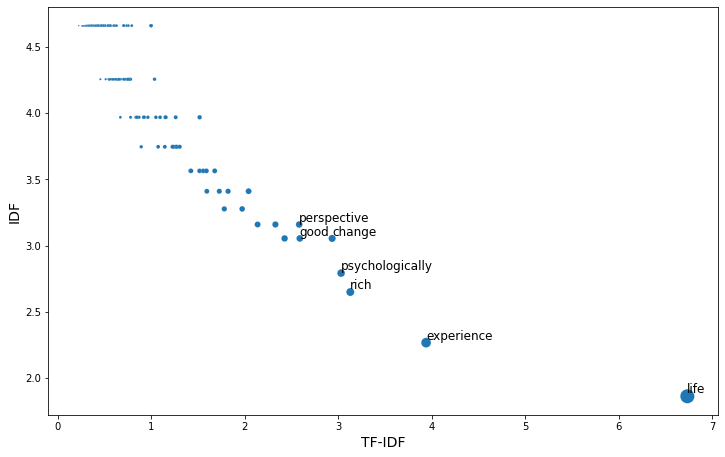

In [8]:
# Escribe tu respuesta aquí
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF count
tfidf_vectorizer = TfidfVectorizer(
    analyzer="word",
    min_df=0.001,
    max_df=0.75,
    sublinear_tf=True,
)
X = tfidf_vectorizer.fit_transform(content_sentences)

idf = tfidf_vectorizer.idf_
tfidf = X.sum(axis=0).A1

# Plot
plt.figure(figsize=(12, 7.5))
sns.scatterplot(x=tfidf, y=idf, size=tfidf / idf, legend=False, sizes=(1, 200))
plt.xlabel("TF-IDF", size=14)
plt.ylabel("IDF", size=14)
names = tfidf_vectorizer.get_feature_names_out()
top = (tfidf / idf).argsort()[-7:]
for i in top:
    plt.text(tfidf[i], idf[i], str(names[i]), size=12, va="bottom", ha="left")

## Segunda parte

Carga nuevamente los tweets que trabajaste la semana pasada:

In [17]:
import tweepy

# Authenticate
consumerKey = "TYPE HERE"
consumerSecret = "TYPE HERE"
accessToken = "TYPE HERE"
accessTokenSecret = "TYPE HERE"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Get tweets
keyword = "#JohnnyDeppIsInnocent"
noOfTweet = 2000
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)

# Put tweets in list
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet.text)

4.  Crea una Serie de Pandas a partir de esta lista de tweets. Retira los duplicados y quita los caracteres indeseados utilizando expresiones regulares. 

In [18]:
# Escribe tu respuesta aquí
import pandas as pd
import re
from unicodedata import normalize

# Put tweets in Data Frame and drop duplicates
ser = pd.Series(data=tweet_list)
ser.drop_duplicates(keep=False, inplace=True)

# Puedes usar estas funciones para remover los caracteres indeseados.
remove_rt = lambda x: re.sub("RT @\w+: ", " ", x)
remove_tilde = lambda x: re.sub(
    r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+",
    r"\1",
    normalize("NFD", x),
    0,
    re.I,
)
rt = lambda x: re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x
)

new_ser = ser.map(remove_rt).map(remove_tilde).map(rt)
new_ser = new_ser.str.lower()
new_ser

4        johnnydepp  johnnydeppvsamberheardtrial  john...
8       always helping   johnnydepp  johnnydeppgotjust...
10       she began and she ended like baby s breath   ...
12      my mates tanya s new tattoo  by the lone wolf ...
14       amberheardisanabuser  johnnydeppgotjustice   ...
                              ...                        
1988    in my next life johnny better exist and i bett...
1989      exactly  she is in the movie still   amberhe...
1991     mega pints  amp  johnny depp only movies  amp...
1992     the man  the myth  the legend  ben chew   joh...
1998       81  happybirthdayjohnny  istandwithjohnnyde...
Length: 538, dtype: object

5. Crea una nube de palabras con los tweets del hashtag escogido. 

[nltk_data] Downloading package stopwords to /home/renato/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


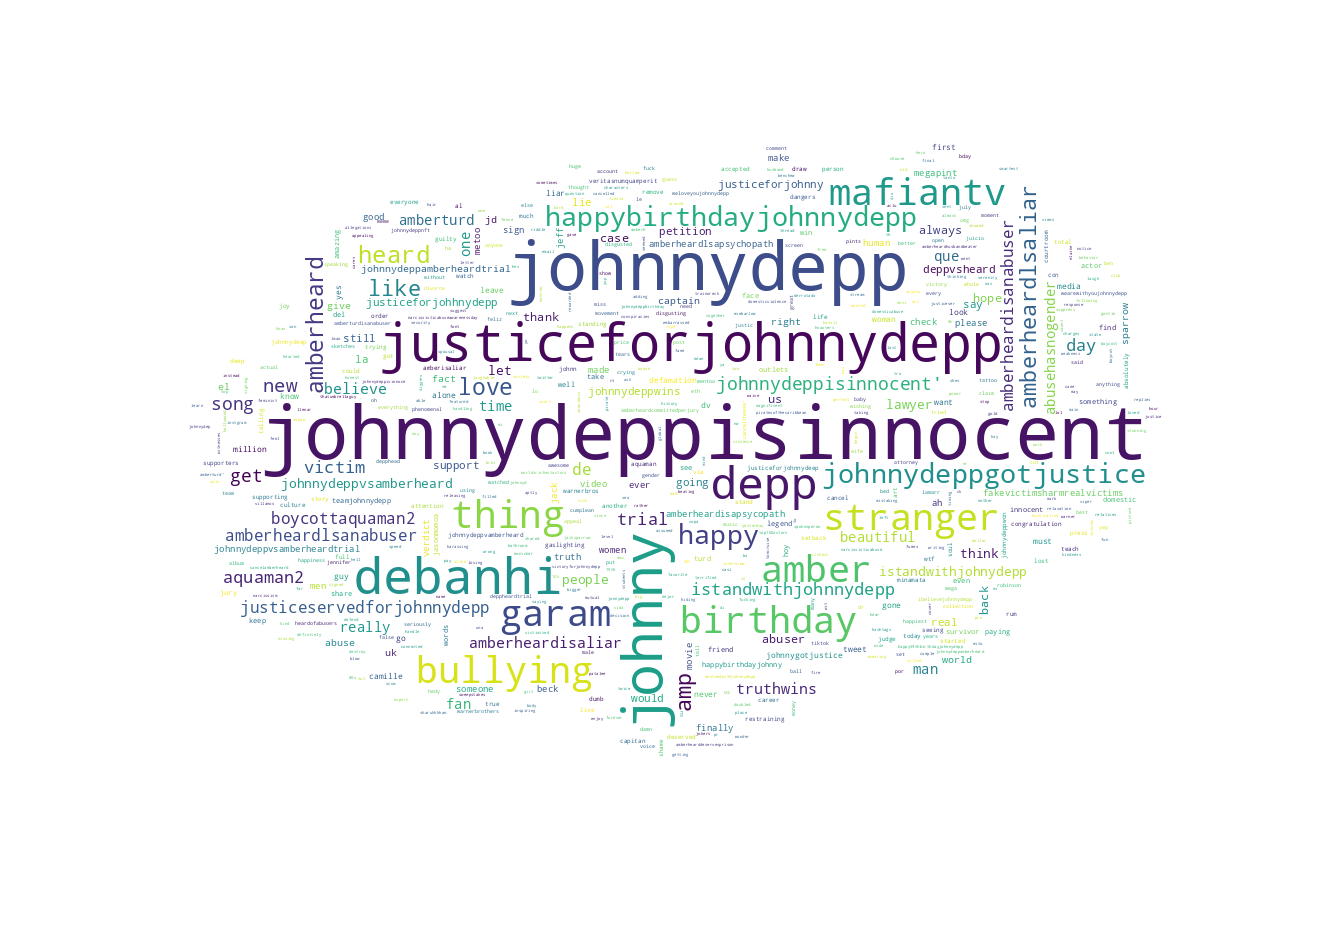

In [24]:
# Escribe tu respuesta aquí
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")


def create_wordcloud(text):
    stopwords_ = set(stopwords.words("english"))
    mask = np.array(Image.open("cloud.png"))

    wc = WordCloud(
        background_color="white",
        mask=mask,
        max_words=3000,
        stopwords=stopwords_,
        collocations=False,
    )
    wc.generate(str(text))
    wc.to_file("wc.png")
    path = "wc.png"
    display(Image.open(path))


create_wordcloud(new_ser.values)